<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [22]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

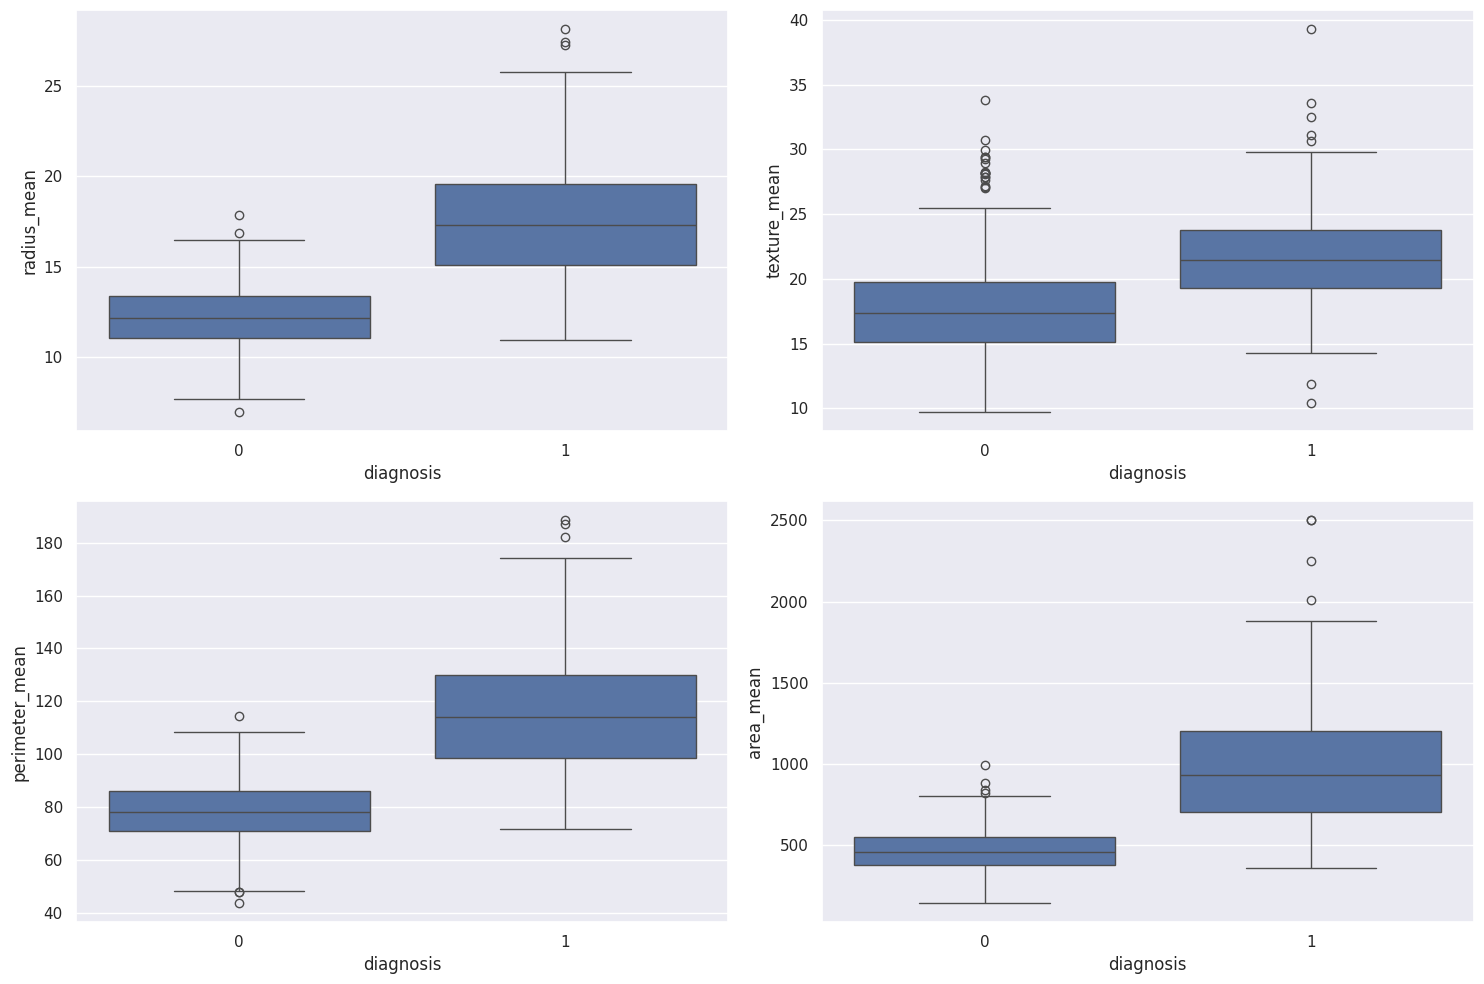

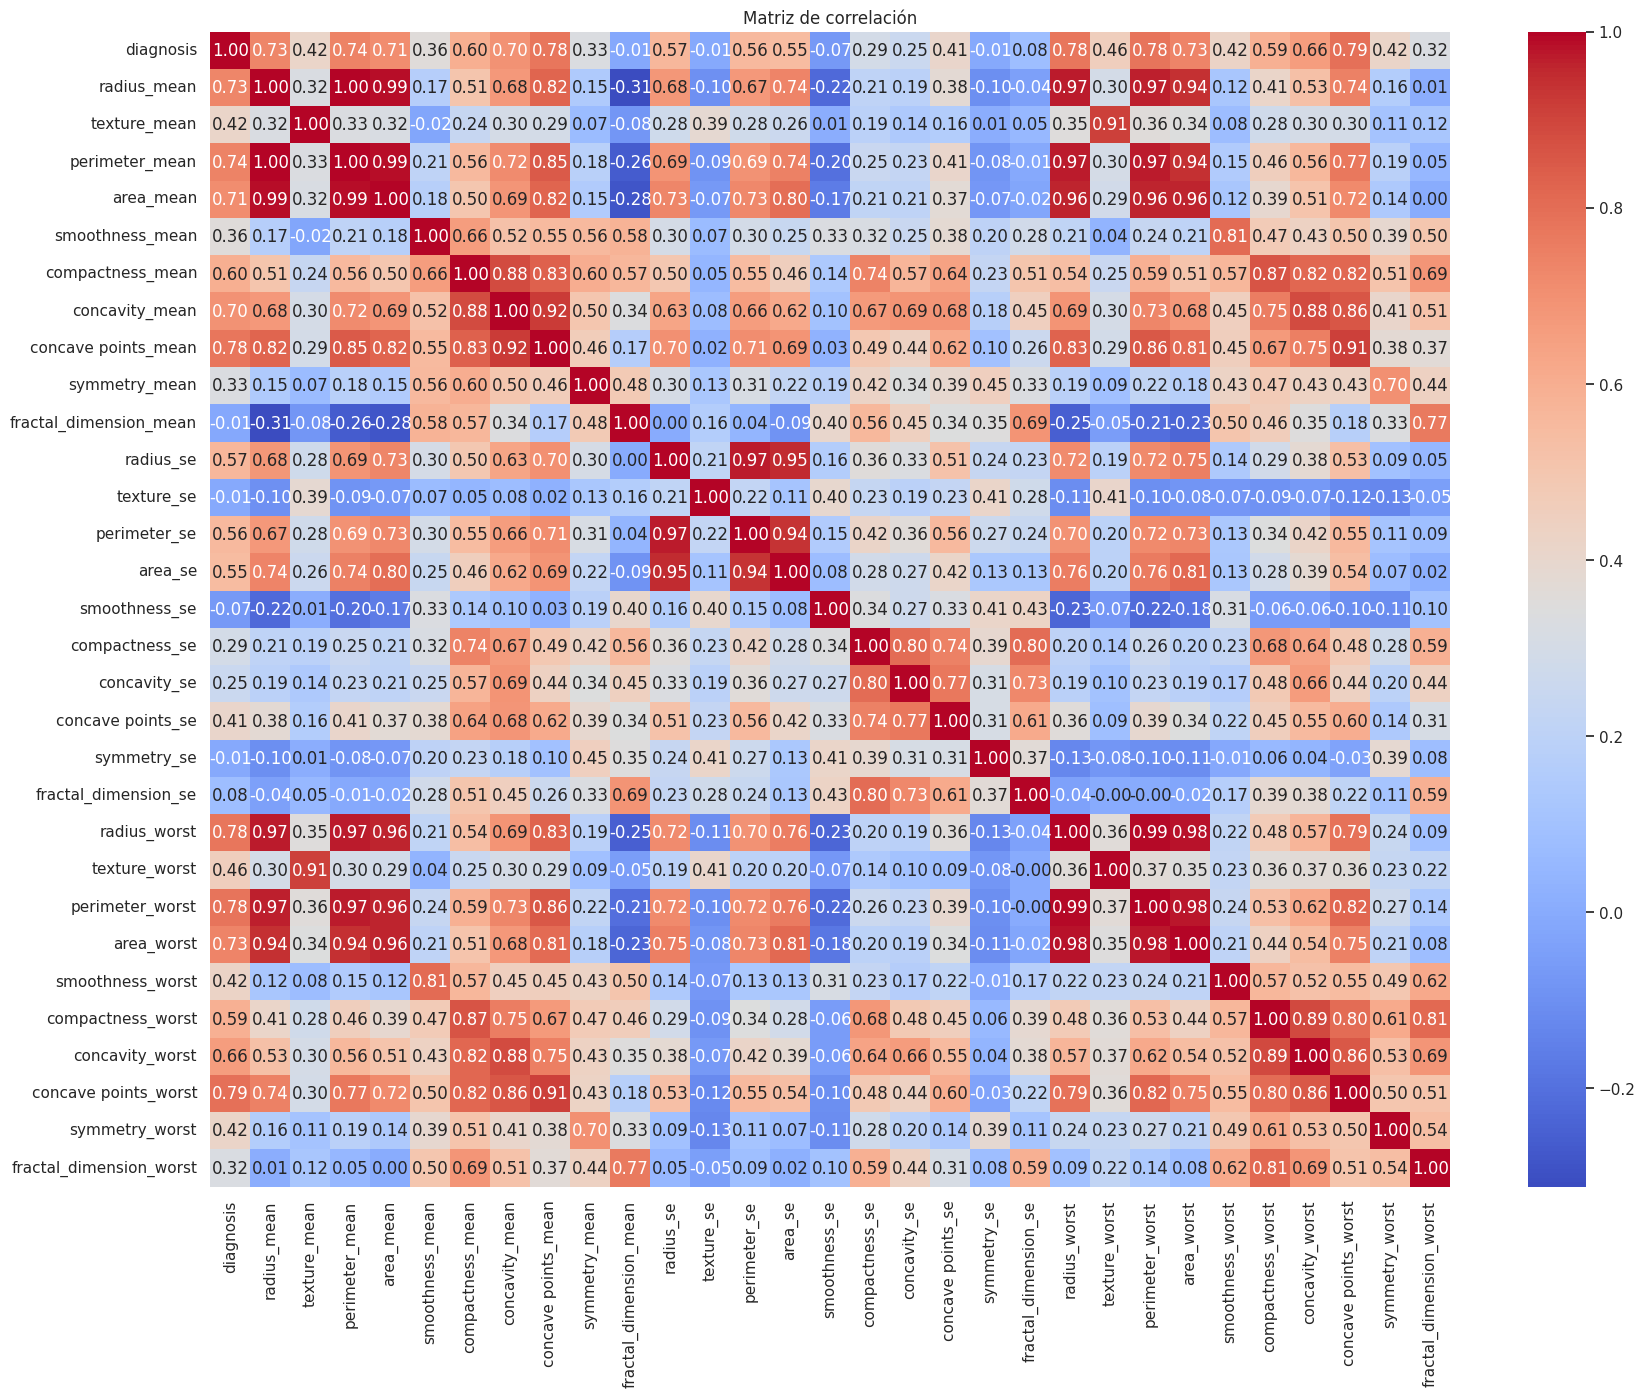

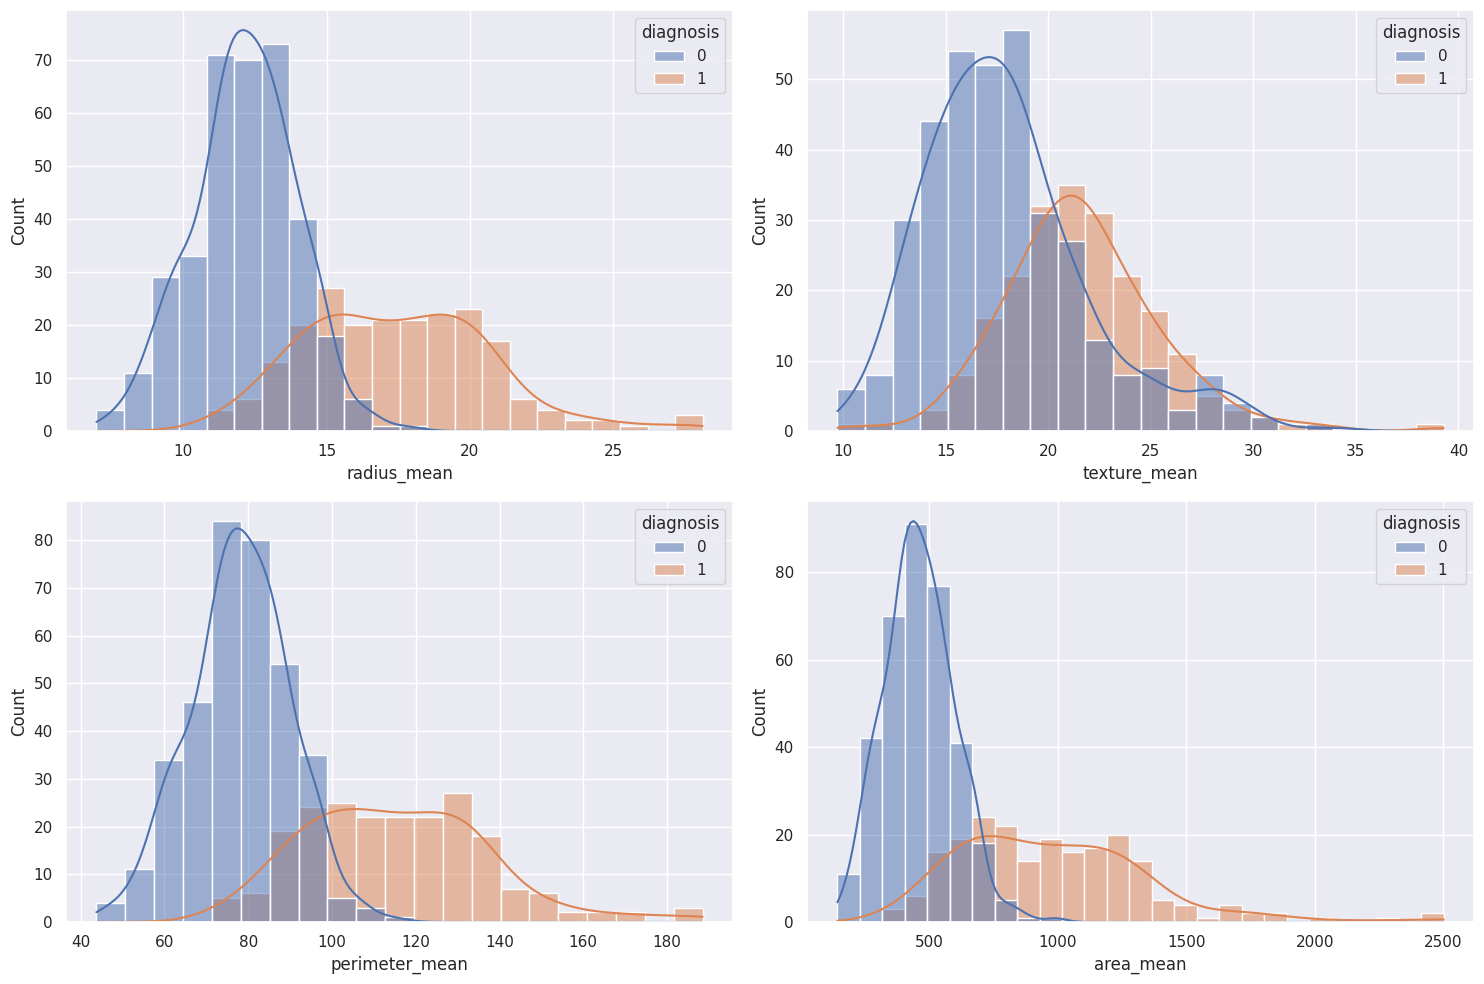

In [23]:
print(df.describe())

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='diagnosis', y='texture_mean', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.tight_layout()
plt.show()


correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de correlación')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True)
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='texture_mean', hue='diagnosis', kde=True)
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', kde=True)
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True)
plt.tight_layout()
plt.show()


Las variables de tamaño (radius, perimeter, area) y las de concavidad (concavity, concave points, compactness), en especial sus versiones _worst, tienden a ser mayores en tumores malignos y son de las más discriminativas.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [24]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_preprocessed = X_scaled.drop('perimeter_mean', axis=1)
X_preprocessed = X_scaled.drop('area_mean', axis=1)

display(X_preprocessed.head())

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Las variables perimeter_mean y area_mean se elimina porque está fuertemente correlacionada con otras variables que miden el tamaño del tumor, especialmente con radius_mean, ademas corrige la multicolinealidad y mejora la calidad del modelo sin perder información relevante.
Se mantiene un conjunto de variables representativo, interpretativo y numéricamente estable para las etapas de modelado posteriores.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


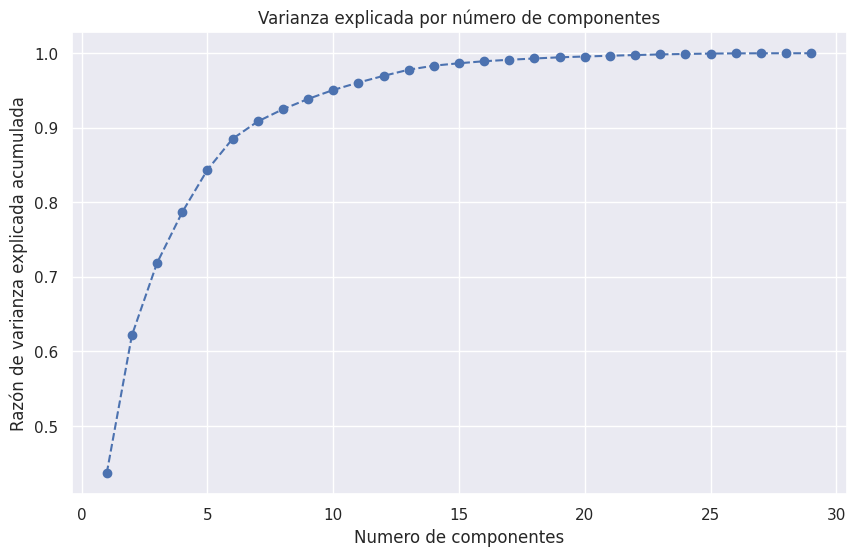

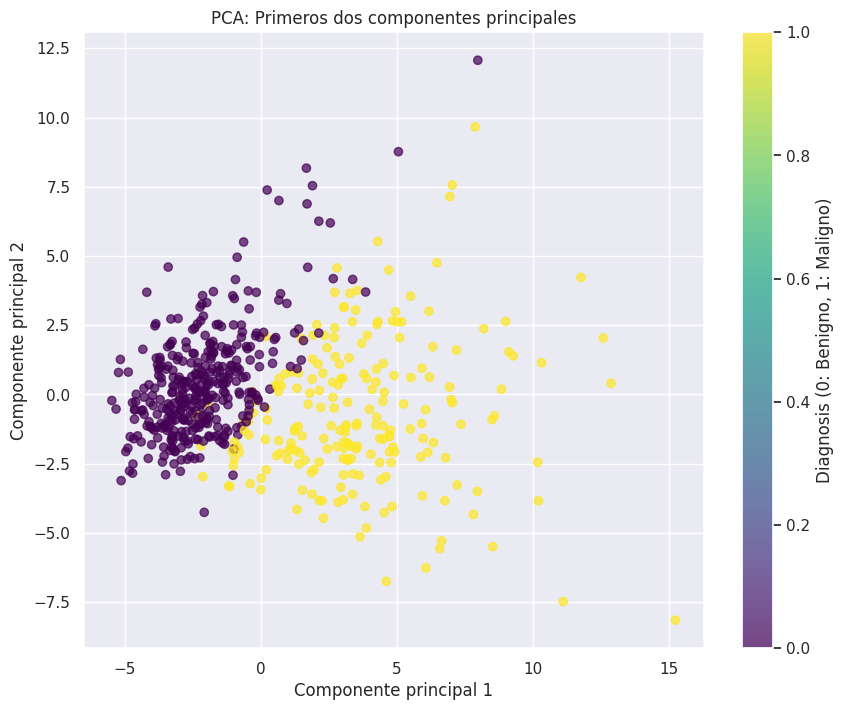

In [25]:
pca = PCA()
X_pca = pca.fit_transform(X_preprocessed)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada por número de componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Razón de varianza explicada acumulada')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: Primeros dos componentes principales')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Diagnosis (0: Benigno, 1: Maligno)')
plt.grid(True)
plt.show()


Se ve un “codo” claro entre 5 y 7 componentes: con ~5 componentes superas ~0.88–0.90. Se ve una separación principalmente a lo largo de PC1: los puntos malignos (1) aparecen desplazados hacia la derecha (PC1 más alta), y los benignos (0) hacia la izquierda.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.01, 0.1, 1, 10, 100]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    }
}

results = {}
for name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)


    results[name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': conf_matrix,
        'AUC-ROC': auc_roc
    }

for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Best Hyperparameters: {metrics['Best Params']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print(f"AUC-ROC: {metrics['AUC-ROC']:.4f}")
    print("-" * (len(name) + 6))

--- Logistic Regression ---
Best Hyperparameters: {'C': 0.1}
Accuracy: 0.9942
Precision: 1.0000
Recall: 0.9841
F1-score: 0.9920
Confusion Matrix:
 [[108   0]
 [  1  62]]
AUC-ROC: 0.9987
-------------------------
--- SVM ---
Best Hyperparameters: {'C': 1, 'gamma': 'scale'}
Accuracy: 0.9766
Precision: 0.9683
Recall: 0.9683
F1-score: 0.9683
Confusion Matrix:
 [[106   2]
 [  2  61]]
AUC-ROC: 0.9968
---------
--- Random Forest ---
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.9708
Precision: 0.9833
Recall: 0.9365
F1-score: 0.9593
Confusion Matrix:
 [[107   1]
 [  4  59]]
AUC-ROC: 0.9952
-------------------


Logistic Regression es el modelo más equilibrado:

Tiene la mayor exactitud (99.4%) y el mejor F1-score (0.992).

Además, comete muy pocos errores (solo 1 falso negativo).


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Regresión Logística (RL) es el mejor candidato para este dataset, esto debido a los resultados anteriores.

El preprocesamiento vita que variables de gran escala (área/perímetro) dominen el ajuste, además reduce varianza de coeficientes y el riesgo de sobreajuste controlando la multicolinealidad

Posbles mejoras: Reportar intervalos de confianza, Aplicar calibración y Validación externa (otro hospital/periodo) para evaluar shift y generalización.